### Cap. 5
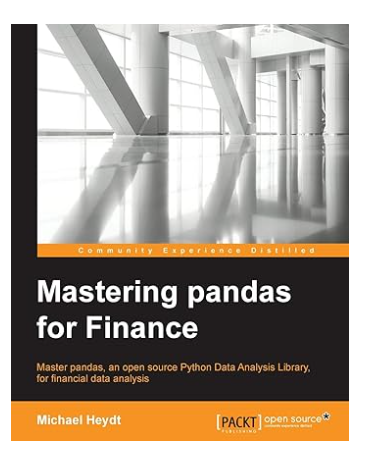

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [2]:
start = datetime.date(2014,5,31)
end = datetime.date(2024,3,31)
msft = yf.download('MSFT', start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
msft[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-02,40.950001,41.090000,40.680000,40.790001,34.722198,18504300
2014-06-03,40.599998,40.680000,40.250000,40.290001,34.296577,18068900
2014-06-04,40.209999,40.369999,39.860001,40.320000,34.322136,23209000
2014-06-05,40.590000,41.250000,40.400002,41.209999,35.079739,31865200
2014-06-06,41.480000,41.660000,41.240002,41.480000,35.309586,24060500


In [4]:
def get(tickers, start, end):
    def data(ticker):
        return yf.download(ticker, start, end)
    datas = map(data, tickers) # map applica la funzione data a ciascun elemento nella lista "tickers", restituendo un iteratore contenente i risultati
    return pd.concat(datas,keys=tickers, names = ['Ticker','Date']) # l'iteratore datas viene passato alla funzione concat che concatena i dati in un DataFrame

In [5]:
tickers = ['AAPL','MSFT','GE','IBM','AA','DAL','UAL','PEP','KO','^GSPC']
all_data =get(tickers,start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
all_data[:5]

Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2014-06-02  22.641430  22.672501  22.232143  22.451786  19.859394   
       2014-06-03  22.445000  22.812143  22.437500  22.769285  20.140238   
       2014-06-04  22.765715  23.138929  22.718214  23.029285  20.370216   
       2014-06-05  23.078571  23.191786  22.950357  23.119642  20.450140   
       2014-06-06  23.210714  23.259287  23.016787  23.056070  20.393902   

                      Volume  
Ticker Date                   
AAPL   2014-06-02  369350800  
       2014-06-03  292709200  
       2014-06-04  335482000  
       2014-06-05  303805600  
       2014-06-06  349938400

In [7]:
just_closing_prices = all_data[['Adj Close']].reset_index()

In [8]:
daily_close_px = just_closing_prices.pivot(index = 'Date', columns = 'Ticker', values = 'Adj Close')

In [9]:
daily_close_px[:5]

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL,^GSPC
Date,,,,,,,,,,
2014-06-02,31.441425,19.859394,36.194862,103.524078,115.779167,29.744972,34.722198,65.871025,46.700001,1924.969971
2014-06-03,31.032213,20.140238,36.532204,103.369728,114.956139,29.759529,34.296577,66.133408,47.509998,1924.239990
2014-06-04,31.418697,20.370216,37.437756,102.443687,115.043427,29.694004,34.322136,66.031464,46.869999,1927.880005
2014-06-05,31.827908,20.450140,36.842941,103.292549,115.959938,29.766806,35.079739,66.280701,47.000000,1940.459961
2014-06-06,32.623604,20.393902,37.491020,104.874535,116.203163,29.839603,35.309586,66.393974,48.049999,1949.439941


### Rendimento percentuale

In [10]:
daily_pct_change = daily_close_px.pct_change() # metodo per il calcolo del ritorno netto (riga / riga precedente) - 1
daily_pct_change.head()

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL,^GSPC
Date,,,,,,,,,,
2014-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-03,-0.013015,0.014142,0.009320,-0.001491,-0.007109,0.000489,-0.012258,0.003983,0.017345,-0.000379
2014-06-04,0.012454,0.011419,0.024788,-0.008959,0.000759,-0.002202,0.000745,-0.001541,-0.013471,0.001892
2014-06-05,0.013024,0.003924,-0.015888,0.008286,0.007967,0.002452,0.022073,0.003775,0.002774,0.006525
2014-06-06,0.025000,-0.002750,0.017590,0.015316,0.002097,0.002446,0.006552,0.001709,0.022340,0.004628


In [11]:
daily_pct_change.dropna(inplace=True) # serve per rimuovere i valori NaN

In [12]:
daily_pct_change.head()

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL,^GSPC
Date,,,,,,,,,,
2014-06-03,-0.013015,0.014142,0.009320,-0.001491,-0.007109,0.000489,-0.012258,0.003983,0.017345,-0.000379
2014-06-04,0.012454,0.011419,0.024788,-0.008959,0.000759,-0.002202,0.000745,-0.001541,-0.013471,0.001892
2014-06-05,0.013024,0.003924,-0.015888,0.008286,0.007967,0.002452,0.022073,0.003775,0.002774,0.006525
2014-06-06,0.025000,-0.002750,0.017590,0.015316,0.002097,0.002446,0.006552,0.001709,0.022340,0.004628
2014-06-09,0.000000,0.016002,-0.008525,0.009566,-0.000805,-0.001952,-0.005063,0.001024,-0.034755,0.000939


### Rendimento cumulato

In [13]:
cum_daily_return = (1 + daily_pct_change).cumprod() # metodo per il calcolo del ritorno lordo cumulativo
cum_daily_return

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL,^GSPC
Date,,,,,,,,,,
2014-06-03,0.986985,1.014142,1.009320,0.998509,0.992891,1.000489,0.987742,1.003983,1.017345,0.999621
2014-06-04,0.999277,1.025722,1.034339,0.989564,0.993645,0.998286,0.988478,1.002436,1.003640,1.001512
2014-06-05,1.012292,1.029746,1.017905,0.997764,1.001561,1.000734,1.010297,1.006219,1.006424,1.008047
2014-06-06,1.037599,1.026915,1.035811,1.013045,1.003662,1.003181,1.016917,1.007939,1.028908,1.012712
2014-06-09,1.037599,1.043347,1.026981,1.022736,1.002854,1.001223,1.011768,1.008971,0.993148,1.013663
...,...,...,...,...,...,...,...,...,...,...
2024-03-22,0.996260,8.663237,1.257176,1.347863,1.632109,2.033621,12.325488,2.611467,0.995075,2.719097
2024-03-25,1.010855,8.591329,1.252488,1.335089,1.614577,2.030595,12.156449,2.620272,0.961242,2.710790
2024-03-26,1.001971,8.534003,1.266552,1.335550,1.612096,2.035302,12.121664,2.622245,0.972591,2.703201


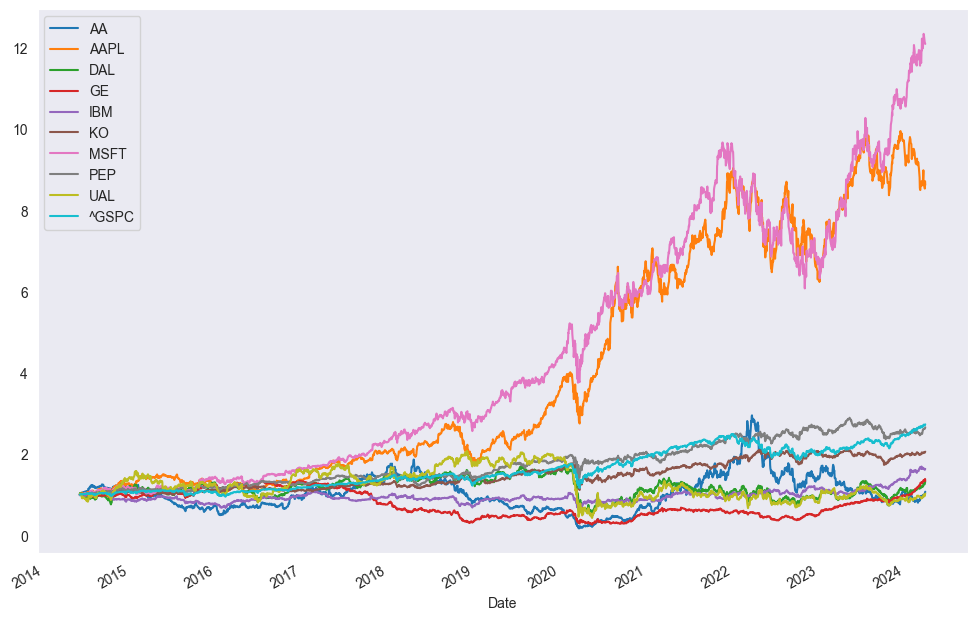

In [14]:
cum_daily_return.plot(figsize = (12,8))
plt.legend(loc=2) # loc=2 indica la posizione della legenda
plt.grid()

### Statistiche descrittive

In [15]:
aapl = daily_pct_change['AAPL']

In [16]:
aapl.describe()

count    2473.000000
mean        0.001031
std         0.017880
min        -0.128647
25%        -0.007322
50%         0.000766
75%         0.010159
max         0.119809
Name: AAPL, dtype: float64

In [17]:
ge = daily_pct_change['GE']

In [18]:
ge.describe()

count    2473.000000
mean        0.000355
std         0.021616
min        -0.151592
25%        -0.009190
50%         0.000000
75%         0.009395
max         0.147299
Name: GE, dtype: float64

In [19]:
sp500 = daily_pct_change['^GSPC']

In [20]:
sp500.describe()

count    2473.000000
mean        0.000469
std         0.011227
min        -0.119841
25%        -0.003772
50%         0.000597
75%         0.005700
max         0.093828
Name: ^GSPC, dtype: float64

In [21]:
aapl.describe(percentiles=[0.025, 0.5, 0.975]) # puoi modificare i percentili mostrati

count    2473.000000
mean        0.001031
std         0.017880
min        -0.128647
2.5%       -0.035826
50%         0.000766
97.5%       0.035729
max         0.119809
Name: AAPL, dtype: float64

### Distribuzione dei rendimenti

#### Istogrammi

L'istogramma è la rappresentazione grafica (diagramma) di una distribuzione in classi di un carattere continuo. <br>
L'istogramma è costituito da rettangoli adiacenti, le cui basi sono allineate su un asse orientato e dotato di unità di misura (l'asse ha l'unità di misura del carattere e può essere inteso come l'asse delle ascisse). <br>
L'adiacenza dei rettangoli dà conto della continuità del carattere: ogni rettangolo ha base di lunghezza pari all'ampiezza della corrispondente classe; l'altezza invece è calcolata come densità di frequenza, ossia è pari al rapporto fra la frequenza (assoluta) associata alla classe e l'ampiezza della classe.

L'area della superficie di ogni rettangolo coincide con la frequenza associata alla classe cui il rettangolo si riferisce e per tale caratteristica gli istogrammi rappresentano un tipo di areogramma. La somma delle aree dei rettangoli è uguale alla somma delle frequenze dei valori appartenenti alle varie classi.

Volendo si può scegliere di rappresentare nell'istogramma le frequenze relative (anziché le semplici frequenze assolute) delle varie classi.

Dividendo le frequenze relative di un istogramma per l'ampiezza di ciascuna classe si attuerà un processo di normalizzazione dell'istogramma ottenendo così un istogramma di densità, la cui somma delle aree delle ampiezze di ciascuna classe rappresentata sarà uguale ad 1.

<Axes: >

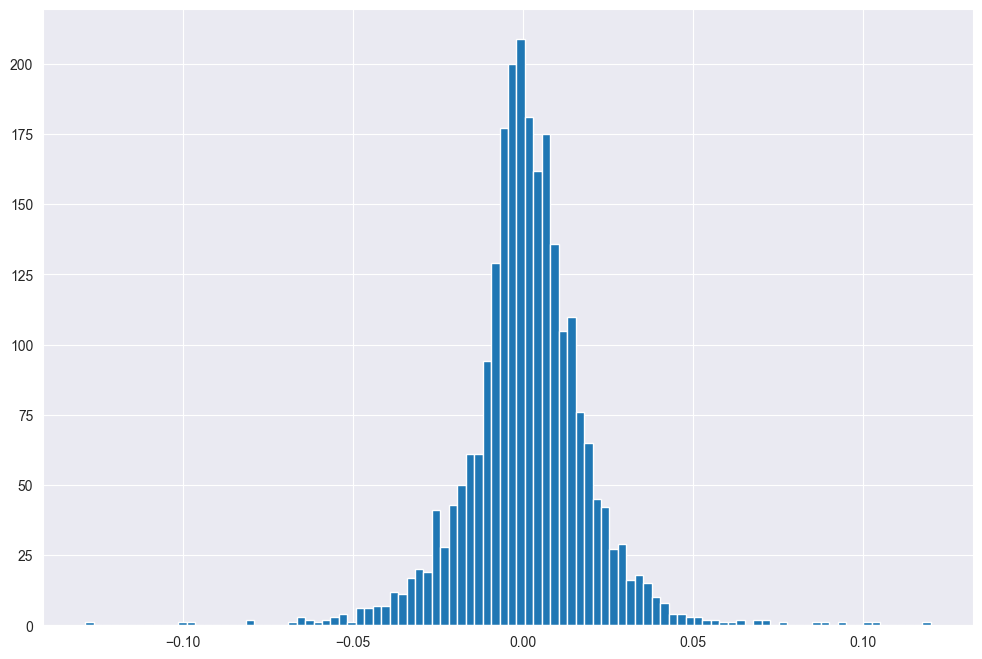

In [22]:
aapl.hist(bins = 100, figsize = (12,8))

E' importante dividere la distribuzione in un numero elevato di intervalli, altrimenti si perde l'idea di come è fatta

<Axes: >

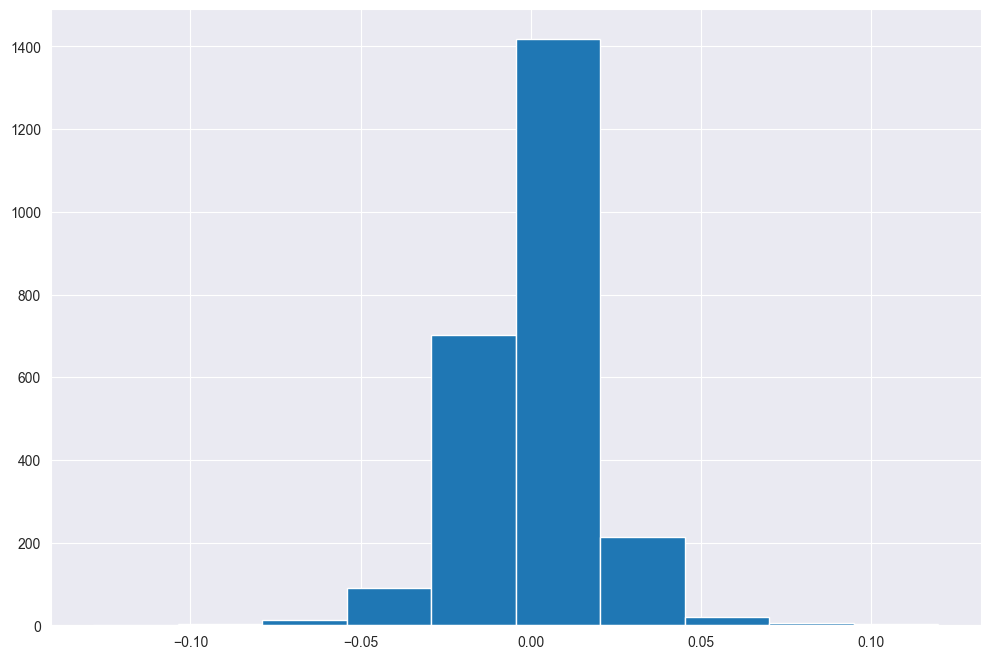

In [23]:
aapl.hist(bins = 10, figsize = (12,8))

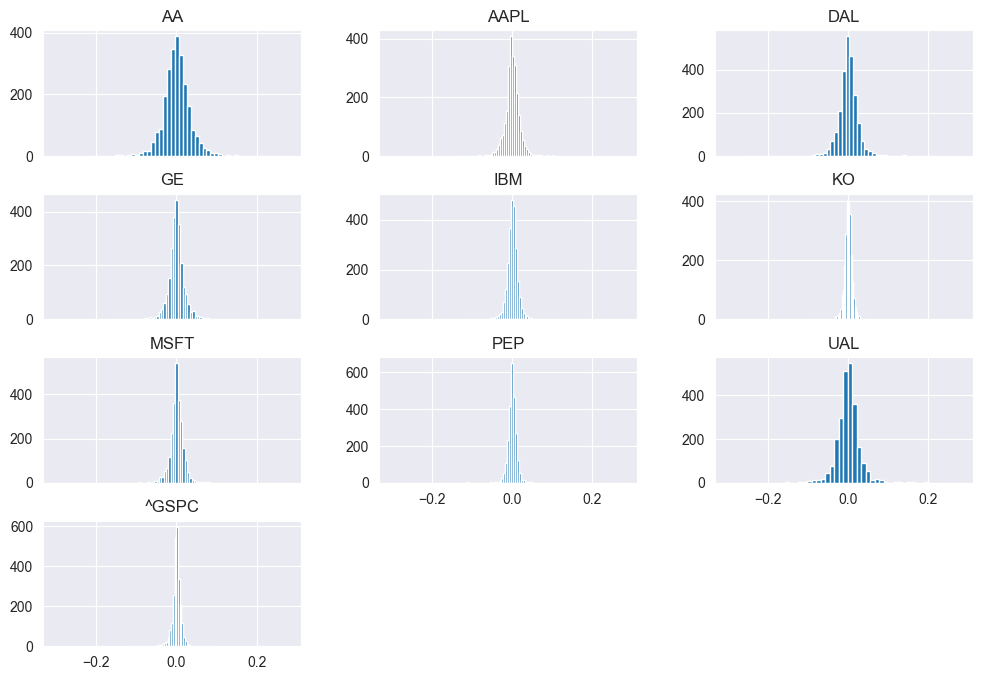

In [24]:
daily_pct_change.hist(bins = 50, sharex = True, figsize = (12,8));

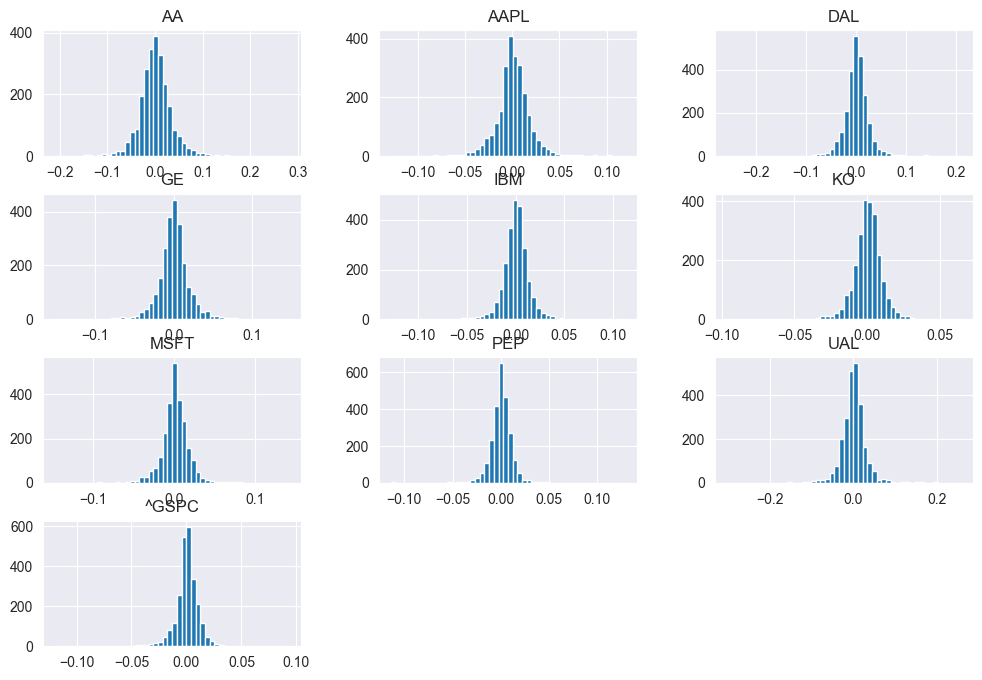

In [25]:
daily_pct_change.hist(bins = 50, sharex = False, figsize = (12,8));

#### QQ Plot (Grafico quantili/quantili)

Il Q-Q Plot è la rappresentazione grafica dei quantili di una distribuzione. <br>
Confronta la distribuzione cumulata della variabile osservata con la distribuzione cumulata della normale: se la variabile osservata presenta una distribuzione normale, i punti di questa distribuzione congiunta si addensano sulla diagonale che va dal basso verso l'alto e da sinistra verso destra.

In [26]:
import scipy.stats as stats

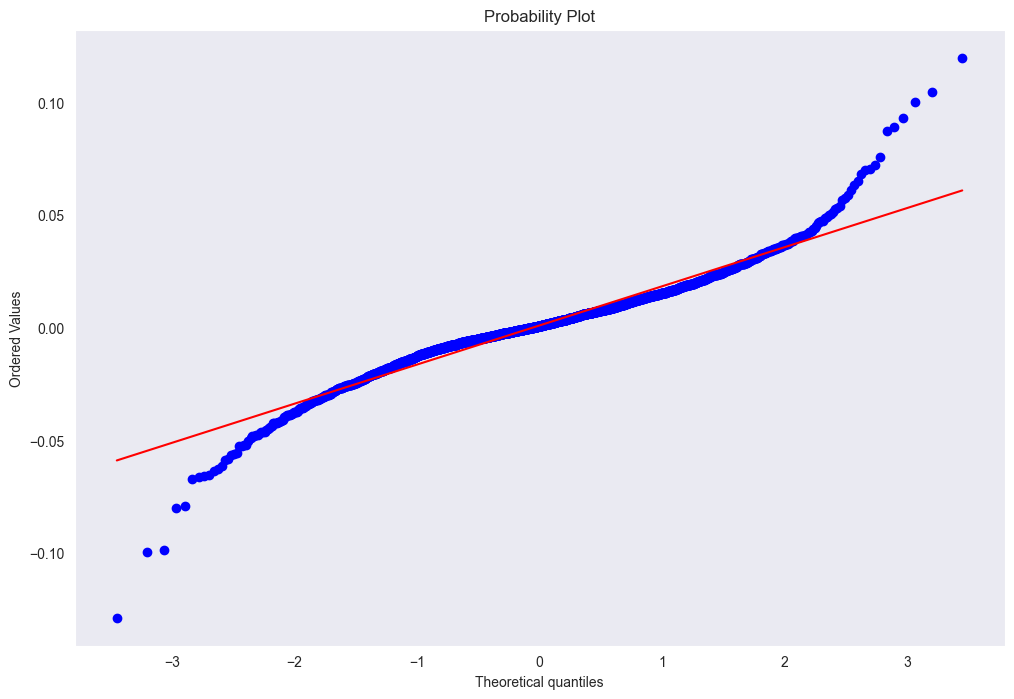

In [27]:
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.grid();

__NB__: nell'esempio seguente abbiamo provato a fare il QQ plot sui prezzi invece che sui ritorni; esattamente come ci si aspettava, la distribuzione è molto lontana dall'essere una normale.

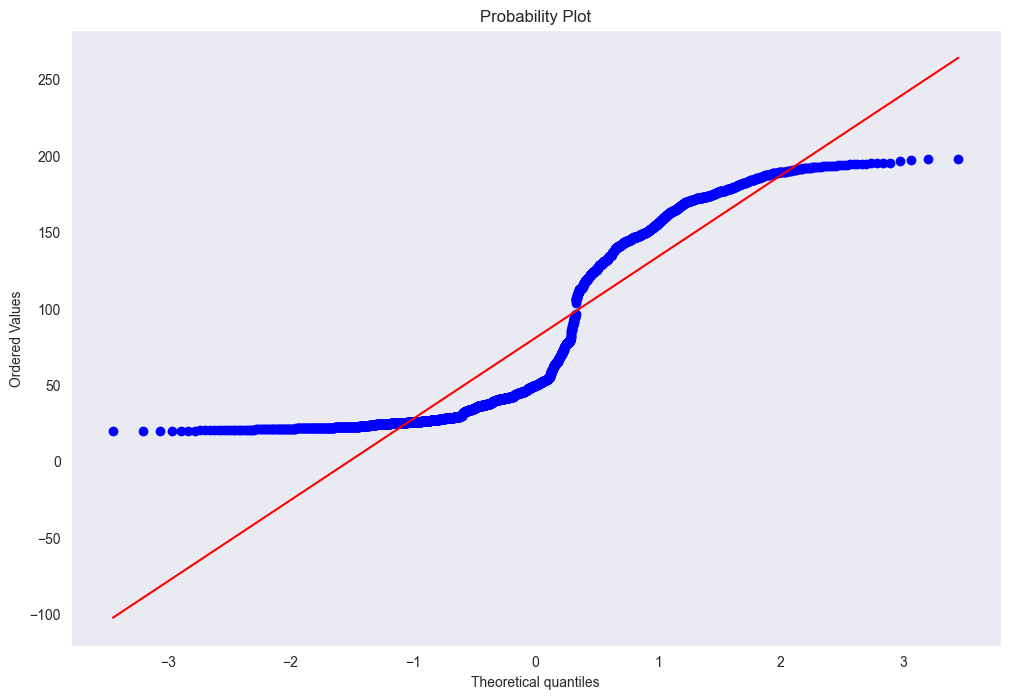

In [28]:
prices = daily_close_px['AAPL']
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(prices, dist='norm', plot=ax)
plt.grid()

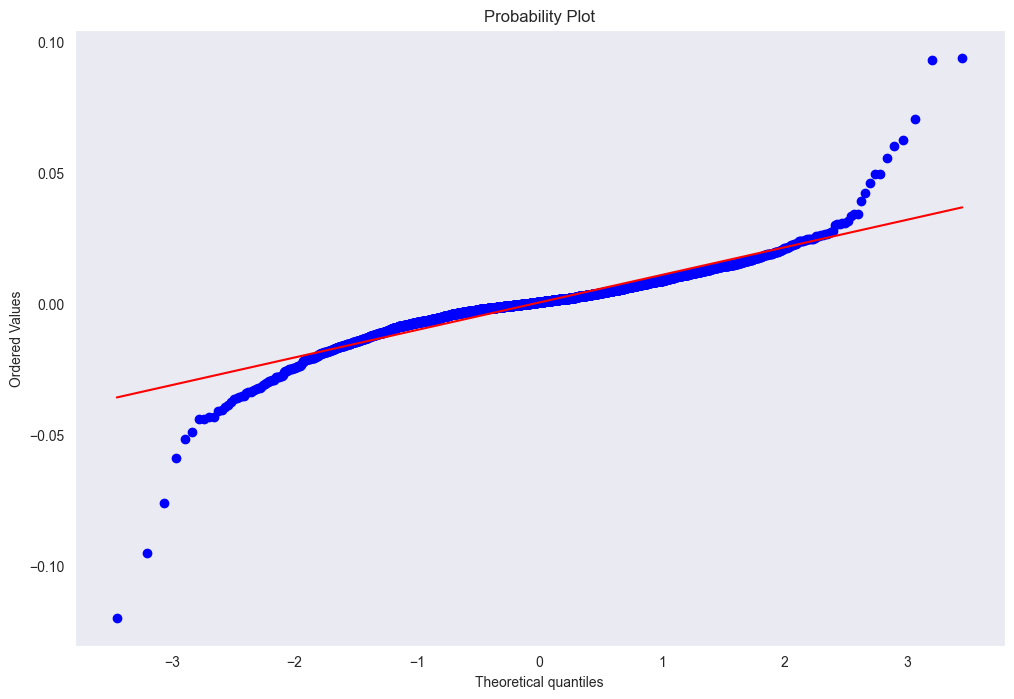

In [29]:
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(sp500, dist='norm', plot=ax)
plt.grid();

#### Box and whisker plots ("scatola e baffi")

In statistica il diagramma a scatola e baffi (o diagramma degli estremi e dei quartili o box and whiskers plot o box-plot) è una rappresentazione grafica utilizzata per descrivere la distribuzione di un campione tramite semplici indici di dispersione e di posizione.

Viene rappresentato (orientato orizzontalmente o verticalmente) tramite un rettangolo diviso in due parti, da cui escono due segmenti. Il rettangolo (la "scatola") è delimitato dal primo e dal terzo quartile, q1/4 e q3/4 ("inter-quartile range"), e diviso al suo interno dalla mediana, q1/2. I segmenti (i "baffi") sono delimitati dal minimo e dal massimo dei valori.

In questo modo vengono rappresentati graficamente i quattro intervalli ugualmente popolati delimitati dai quartili.

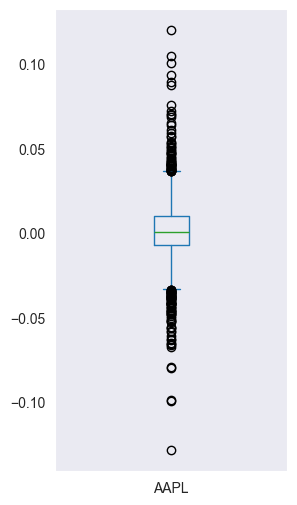

In [30]:
daily_pct_change[['AAPL']].plot(kind = 'box', figsize = (3,6))
plt.grid();

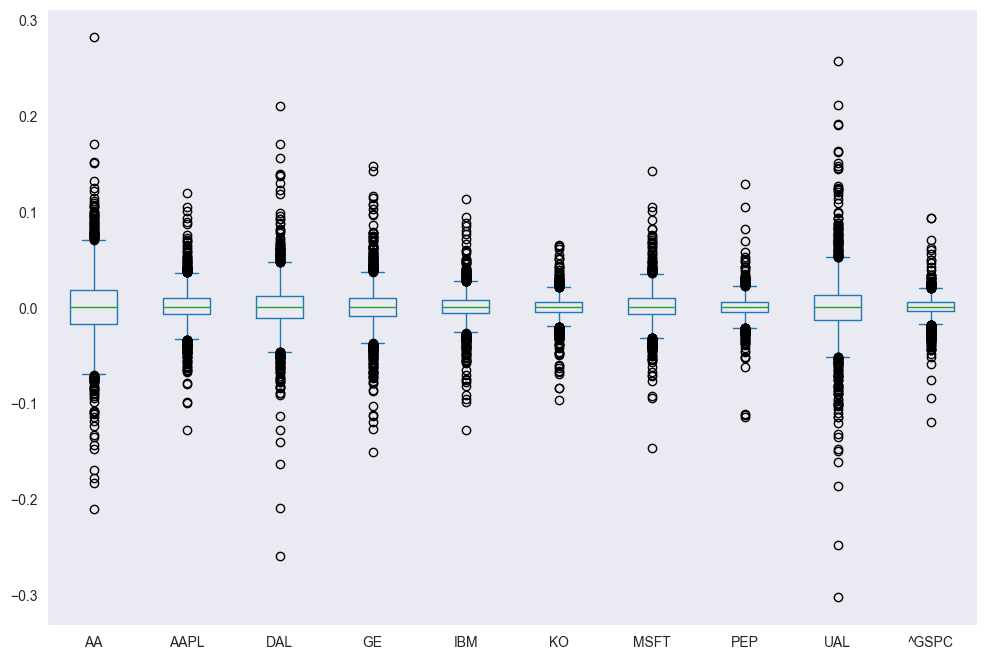

In [31]:
daily_pct_change.plot(kind='box', figsize=(12,8))
plt.grid();

### Scatter plot (grafico a dispersione)
Il grafico a dispersione rappresenta graficamente la relazione tra due variabili.

In [32]:
def render_scatter_plot(data, x_stock_name,
                       y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    ax.autoscale(False)
    ax.vlines(0, -10, 10)
    ax.hlines(0, -10, 10)
    ax.plot((-10,10),(-10,10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)

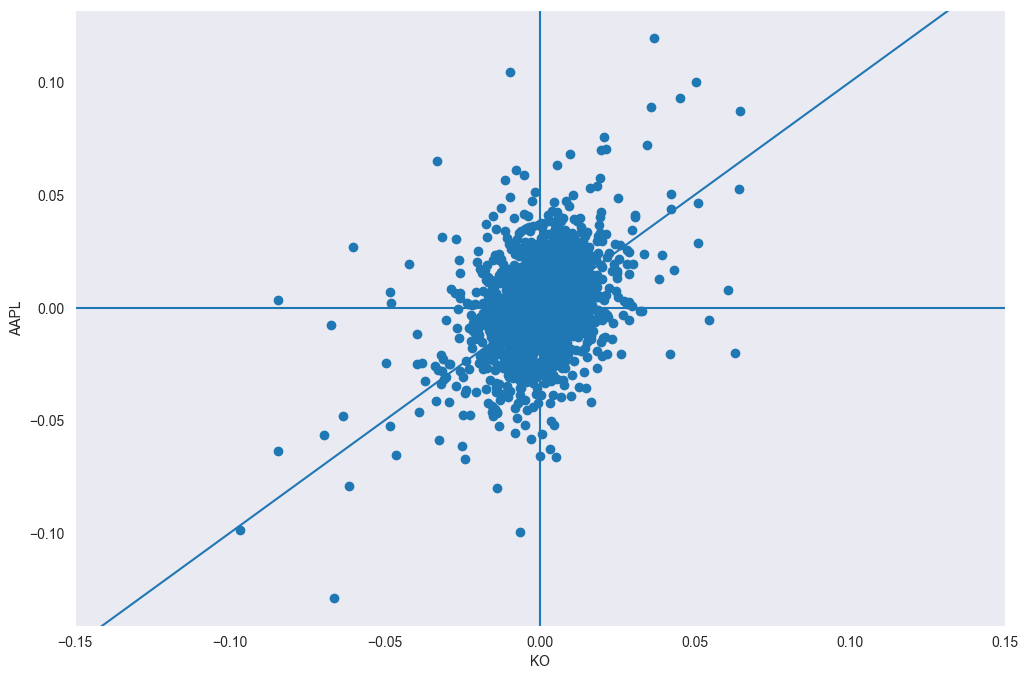

In [33]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change, 'KO', 'AAPL', xlim=limits)
plt.grid()

### Matrice di scatter plot

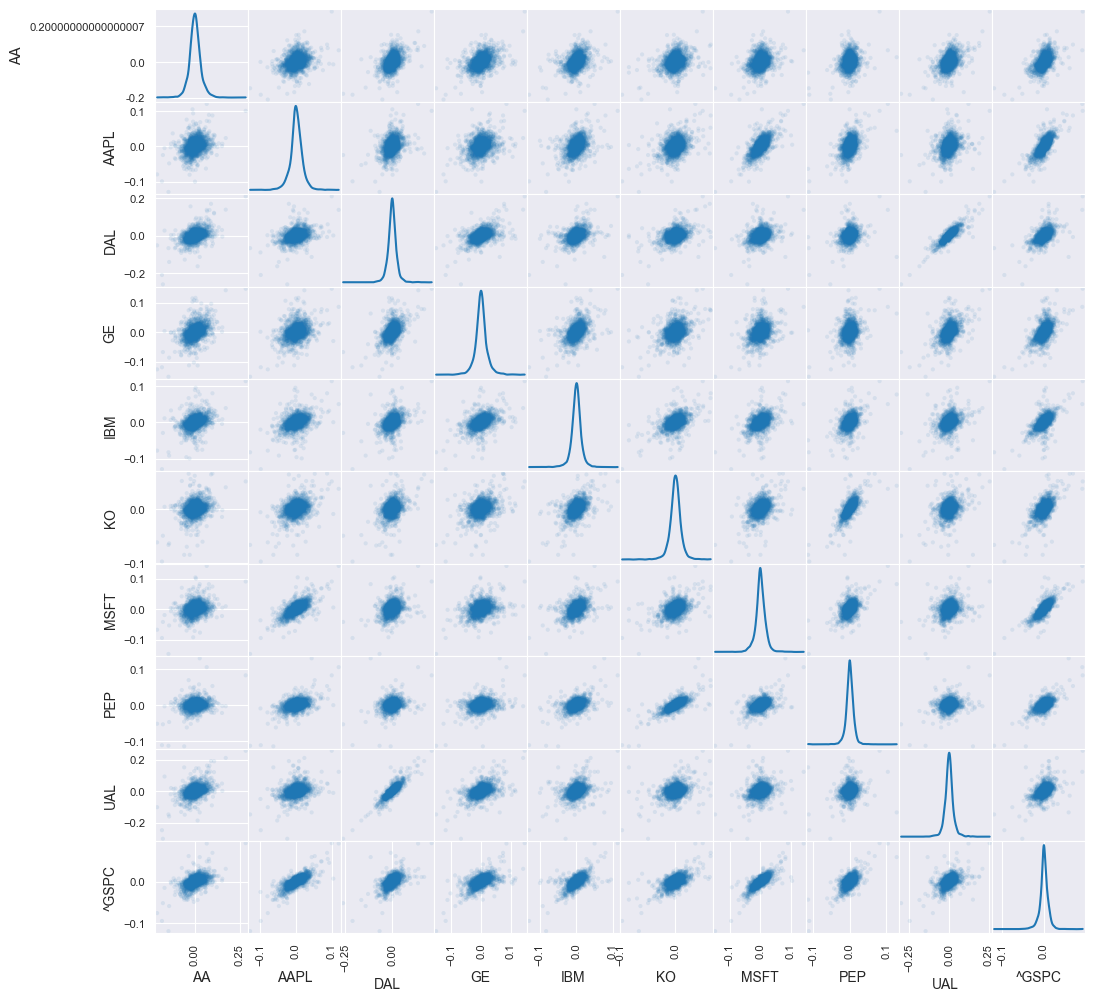

In [34]:
_ = pd.plotting.scatter_matrix(daily_pct_change, diagonal = 'kde', alpha = 0.1, figsize = (12,12));